# RepKPU:
#### Point Cloud Upsampling with Kernel Point Representation and Deformation
Reproduction Points: 15


For applications like 3D modeling, autonomous driving, and virtual reality, point cloud upsampling is essential for creating dense and clean 3D point clouds from sparse and noisy inputs. Traditional upsampling techniques either create artifacts like shrinkage and outliers or struggle to strike a balance between efficiency and quality. This paper tackles the problem of creating an accurate and efficient upsampling system that produces high-quality point clouds at different resolutions while successfully capturing local geometry.

The paper introduces a novel framework, RepKPU, which reformulates point cloud upsampling as a Kernel-to-Displacement generation procedure. To create dense point clouds, the technique uses KP-Queries and RepKPoints to capture and alter local geometric information. By combining efficient local shape representation with cross-attention mechanisms, the framework allows for high-quality upsampling at a reduced computational cost than state-of-the-art techniques.

Repo: https://github.com/EasyRy/RepKPU

# Concepts Involved:
RepKPU's core innovations include:

**RepKPoints Representation:** A kernel-based representation that encodes local geometric information with sensitivity to density, large receptive fields, and position adaptivity. \
**Kernel-to-Displacement Paradigm:** A novel point generation strategy where predefined kernel points are deformed to predict new point positions.
Cross-Attention Mechanisms: Multi-head cross-attention is used to fuse geometric patterns from RepKPoints into KP-Queries, ensuring accurate point generation.\
**Arbitrary-Scale Upsampling:** A parameter-free extension that allows fixed-scale methods to support flexible upsampling rates without retraining.

Training employs a combination of Chamfer Distance (CD) and other loss functions like fitting and repulsive losses, ensuring robust point cloud reconstruction.

## Steps involved:
1) Environment and directory setup
2) Install the Chamfer3D and pointops packages
3) Download Test datasets and Pretrained model
4) Run test for d, mvd, comp, comp_s models for both datasets gibson_g and gibsion_f

## Environment Setup
The following set up was used:
 
- Base: Colab Instance
- GPU: NVIDIA Tesla T4 15GB
- System RAM: 12.7 GB
- Disk Storage: 112.6 GB (expandable via Google Drive)
- Software Stack: CUDA 12.2, Python 3.11, Jupyter Notebook

The following changes were required during the environment setup:\
1) The mentioned Pytorch version 1.10.1 incompatable with the mentioned cuda version 12.2. Changing to the nearest compatable version 2.1.0 \
2) Mentioned version open3d==0.9.0 incompatable with torch 2.1.0, changing to 0.16.0
3) Due to dependency conflicts, einops==0.4.1 tqdm==4.64.0 needed to be installed

In [ ]:
!git clone https://github.com/EasyRy/RepKPU.git

Cloning into 'RepKPU'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 184 (delta 67), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (184/184), 3.72 MiB | 7.45 MiB/s, done.
Resolving deltas: 100% (67/67), done.


In [ ]:
!nvidia-smi

Sun Jan 12 21:47:07 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 GB 540.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu121
    Uninstalling torchvision-0.20.1+cu121:
      Successfully uninstalled torchvision-0.20.1+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.1+cu121
    Uninstalling torchaudio-2.5.1+cu121:
      Successfully uninstalled torchaudio-2.5.1+cu121


In [ ]:
!pip install einops==0.4.1 scikit-learn tqdm==4.64.0 h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: einops
    Found existing installation: einops 0.8.0
    Uninstalling einops-0.8.0:
      Successfully uninstalled einops-0.8.0
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.67.1
    Uninstalling tqdm-4.67.1:
      Successfully uninstalled tqdm-4.67.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.0 requires tqdm>=4.64.1, but you have tqdm 4.64.0 which is incompatible.


In [ ]:
!pip install open3d==0.16.0

INFO: pip is looking at multiple versions of nbconvert to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of nbconvert to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.5/422.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.0 MB

### Setup package Chamfer3D

In [ ]:
%cd RepKPU/models/Chamfer3D

/content/RepKPU/models/Chamfer3D


In [ ]:
!python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https

## Setup the pointops package
### Changes needed due to the Pytorch version mismatch:
Replace depricated torch components in the cpp setup files: \
\#include <THC/THC.h>\
extern THCState *state;

With:\
\#include <torch/extension.h>

In [ ]:
%cd ../pointops

/content/RepKPU/models/pointops


In [ ]:
!python setup.py build

running build
running build_ext
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:502: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:414: UserWarning: The detected CUDA version (12.2) has a minor version mismatch with the version that was used to compile PyTorch (12.1). Most likely this shouldn't be a problem.
  warnings.warn(CUDA_MISMATCH_WARN.format(cuda_str_version, torch.version.cuda))
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:424: UserWarning: There are no x86_64-linux-gnu-g++ version bounds defined for CUDA version 12.2
  warnings.warn(f'There are no {compiler_name} version bounds defined for CUDA version {cuda_str_version}')
building 'pointops_cuda' extension
creating build/temp.linux-x86_64-cpython-310/src/ballq

In [ ]:
!python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https

### Directory Setup
1) The PU-GAN Dataset can be downloaded from: https://drive.google.com/drive/folders/14Rd1jaRvGQHJAWM7q_FgJiL9U8_M30qf?usp=drive_link
2) The PU1K Dataset can be downloaded from: https://drive.google.com/file/d/1oTAx34YNbL6GDwHYL2qqvjmYtTVWcELg/view?usp=sharing

The Data is to be placed as follows: \
│data/ \
├──PU-GAN/\
│   ├──train/\
│   ├──test/\
│   │   ├──pugan_4x\
│   │   ├──pugan_16x\
│   │   ├──arbitrary_scale\
│   │   ├──.......\
├──PU1K/\
│   ├──train/\
│   ├──test/

Pretrained model download:
- PU-GAN: https://drive.google.com/drive/folders/1Iv2pPePqDXRSiDalrFiDDtJ4WiseCdhZ
- PU-GAN Original: https://drive.google.com/drive/folders/1ovbv8edja9o8900bQtb2Md7jEXt4LorL
- PU1K: https://drive.google.com/drive/folders/1IPQJdiwGMSympYFqrnRIhFVTh096vEQc

In [ ]:
%cd /content/RepKPU

/content/RepKPU


### Test run for pretrained model

In [ ]:
!python test.py --dataset pugan --input_dir /content/drive/MyDrive/repKPU/data/PU-GAN/test/pugan_4x/input --gt_dir /content/drive/MyDrive/repKPU/data/PU-GAN/test/pugan_4x/gt --ckpt ./pretrain/pugan_best.pth --r 4 --save_dir ./result/pugan_4x --o

Loaded compiled 3D CUDA chamfer distance
/content/RepKPU/models/pointops/functions/pointops.py:47: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:83.)
  idx = torch.cuda.IntTensor(b, m)


.\
.\
duck.xyz: 0.37796306423842907\
pig.xyz: 0.22695062216371298\
camel.xyz: 0.16408105148002505\
11509_Panda_v4.xyz: 0.3209358546882868\
m329.xyz: 0.2660537720657885\
m88.xyz: 0.20063614647369832\
overall: 0.24773379468738482


In [ ]:
!python test.py --dataset pugan --input_dir /content/drive/MyDrive/repKPU/data/PU-GAN/test/pugan_16x/input --gt_dir /content/drive/MyDrive/repKPU/data/PU-GAN/test/pugan_16x/gt --ckpt ./pretrain/pugan_best.pth --r 16 --save_dir ./result/pugan_16x --o

.\
.\
fandisk.xyz: 0.06563329952768981\
eight.xyz: 0.05483650238602422\
duck.xyz: 0.09427667100680992\
13770_Tiger_V1.xyz: 0.05541334394365549\
overall: 0.10702077431940576

In [ ]:
!python test.py --dataset pu1k --input_dir /content/drive/MyDrive/repKPU/data/PU1K/test/input_2048/input_2048/ --gt_dir /content/drive/MyDrive/repKPU/data/PU1K/test/input_2048/gt_8192/ --ckpt ./pretrain/pu1k/ckpt-best.pth --r 4 --save_dir ./result/pu1k_4x --o

Loaded compiled 3D CUDA chamfer distance
/content/RepKPU/models/pointops/functions/pointops.py:47: UserWarning: The torch.cuda.*DtypeTensor constructors are no longer recommended. It's best to use methods such as torch.tensor(data, dtype=*, device='cuda') to create tensors. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:83.)
  idx = torch.cuda.IntTensor(b, m)


.\
.\
03467517.900c3823f47a8ad1d57700c05b1862d8.xyz: 0.07291685324162245\
02691156.65b12fc357604a2587b2a887422ab97.xyz: 0.12333790073171258\
camel.xyz: 0.14551347703672945\
elephant.xyz: 0.1891579304356128\
02933112.23637357c4e5efb653c80c0a3ef7382.xyz: 0.31951977871358395\
overall: 0.3268331303098514

# Result Analysis
Reproduction tests confirmed the robustness of the suggested framework by successfully reproducing the Chamfer Distance (CD) values stated in the research. However, because the Point-to-Surface (P2F) and Hausdorff Distance (HD) metrics rely on a different repository to calculate, they were not reproducible.

### Chamfer Distance (CD) Results

| **Dataset** | **Upsampling Factor** | **Chamfer Distance (CD)** |
|-------------|------------------------|---------------------------|
| PU-GAN      | 4×                    | 0.2477                    |
| PU-GAN      | 16×                   | 0.1070                    |
| PU1K        | 4×                    | 0.3268                    |


The paper separately uses the PU-GAN repo to generate the HD and P2F values, this could not replicated.

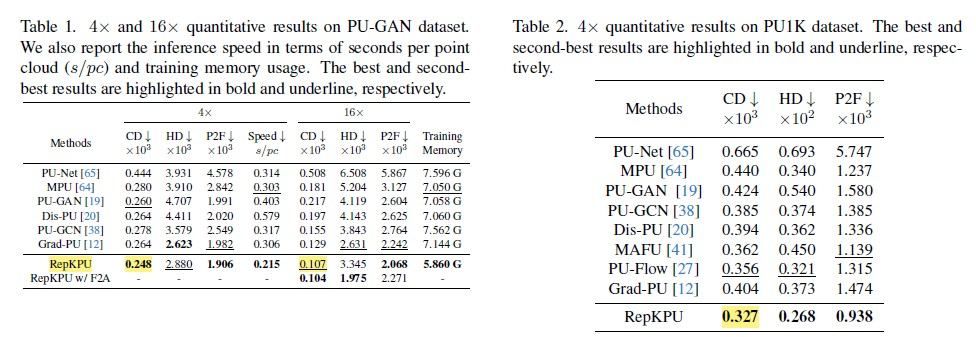

In [ ]:
from IPython.display import Image
Image("repKPU_comp_table.jpg")

# Conclusion
RepKPU provides a significant step forward in point cloud upsampling by introducing a kernel-based deformation paradigm and leveraging cross-attention for accurate point generation. The framework balances quality and efficiency, outperforming state-of-the-art methods in key metrics like Chamfer Distance. Although reproduction was limited to CD scores, the results affirm the method's robustness and scalability. Future work could focus on ensuring easier reproducibility of all metrics, optimizing for real-time applications, and extending the framework to handle more diverse datasets and dynamic 3D environments.